# Sports data analysis

In [1]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('data/SHIFTS_ONLY_Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv', delimiter=';')  # Stellen Sie sicher, dass der Pfad und der Trenner korrekt sind
print(df.columns.tolist())

['Timestamp (ms)', 'Timestamp in local format', 'Player ID', 'Name', 'Event type', 'Duration (s)', 'Distance', 'Distance (speed | Very low)', 'Distance (speed | Low)', 'Distance (speed | Medium)', 'Distance (speed | High)', 'Distance (speed | Very high)', 'Distance (speed | Sprint)', 'Distance (speed | 0 - 0 km/h)', 'Metabolic Power (Ø)', 'Speed (max.)', 'Skating Load', 'Skating Intensity']


In [2]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('data/SHIFTS_ONLY_Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv', delimiter=';')
df.head(100)

,Timestamp (ms),Timestamp in local format,Player ID,Name,Event type,Duration (s),Distance,Distance (speed | Very low),Distance (speed | Low),Distance (speed | Medium),Distance (speed | High),Distance (speed | Very high),Distance (speed | Sprint),Distance (speed | 0 - 0 km/h),Metabolic Power (Ø),Speed (max.),Skating Load,Skating Intensity
0,1670697995000,"12/10/2022, 07:46:35.000 PM",438,D TEST,Shift,34.707001,114,29.0,15.0,25.0,36.0,9.0,0.0,NaN,337.08,22.60,21.67,37.45
1,1670697995000,"12/10/2022, 07:46:35.000 PM",443,D TEST,Shift,43.952999,177,25.0,21.0,39.0,51.0,36.0,4.0,NaN,413.47,24.34,28.74,39.24
2,1670697995000,"12/10/2022, 07:46:35.000 PM",470,D3 Guest,Shift,82.765999,288,45.0,83.0,70.0,87.0,3.0,0.0,NaN,0.00,21.88,51.74,37.51
3,1670697995000,"12/10/2022, 07:46:35.000 PM",471,D4 Guest,Shift,57.615002,215,34.0,29.0,59.0,79.0,14.0,0.0,NaN,0.00,21.75,46.27,48.18
4,1670697995000,"12/10/2022, 07:46:35.000 PM",448,FW TEST,Shift,20.010000,1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,9.93,4.64,0.49,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1670698458000,"12/10/2022, 07:54:18.000 PM",446,FW TEST,Shift,56.028000,203,37.0,32.0,25.0,51.0,31.0,26.0,NaN,411.35,28.49,49.49,53.00
96,1670698458000,"12/10/2022, 07:54:18.000 PM",451,FW TEST,Shift,66.169998,236,36.0,31.0,49.0,77.0,43.0,0.0,NaN,301.12,23.52,45.95,41.66
97,1670698458000,"12/10/2022, 07:54:18.000 PM",482,FW5 Guest,Shift,52.992001,234,26.0,44.0,36.0,16.0,12.0,99.0,NaN,0.00,31.28,35.80,40.53
98,1670698458000,"12/10/2022, 07:54:18.000 PM",483,FW6 Guest,Shift,50.853001,193,42.0,7.0,19.0,36.0,27.0,62.0,NaN,0.00,28.75,34.10,40.24


In [4]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('data/SHIFTS_ONLY_Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv', delimiter=';')

# Stellen Sie sicher, dass 'Timestamp (ms)' als Zahl formatiert ist
df['Timestamp (ms)'] = pd.to_numeric(df['Timestamp (ms)'], errors='coerce')

# Konvertierung der 'Metabolic Power (Ø)' in einen numerischen Typ, um Berechnungen zu ermöglichen
df['Metabolic Power (Ø)'] = pd.to_numeric(df['Metabolic Power (Ø)'], errors='coerce')

# Sortieren der Daten nach 'Player ID' und 'Timestamp (ms)'
df = df.sort_values(by=['Player ID', 'Timestamp (ms)'])

# Berechnung der Zeitdifferenz zwischen aufeinanderfolgenden Events für jeden Spieler
df['Time diff'] = df.groupby('Player ID')['Timestamp (ms)'].diff()

# Festlegen eines Schwellenwerts für die Definition einer Pause (z.B. 30 Sekunden in Millisekunden)
threshold = 30000

# Markierung des Beginns eines neuen Shifts
df['New Shift'] = (df['Time diff'] > threshold) | df['Time diff'].isnull()

# Zuweisung einer Shift-Nummer für jeden Spieler
df['Shift Number'] = df.groupby('Player ID')['New Shift'].cumsum()

# Berechnung der Startzeit jedes Shifts
df['Shift Start'] = df.groupby(['Player ID', 'Shift Number'])['Timestamp (ms)'].transform('first')

# Berechnung der Endzeit jedes Shifts
df['Shift End'] = df.groupby(['Player ID', 'Shift Number'])['Timestamp (ms)'].transform('last')

# Verschieben der 'Shift End' Zeit zur Berechnung der Pause bis zum Beginn des nächsten Shifts
df['Next Shift Start'] = df.groupby('Player ID')['Shift Start'].shift(-1)

# Berechnung der Pause zwischen den Shifts
df['Pause Duration'] = df['Next Shift Start'] - df['Shift End']

# Berechnung des durchschnittlichen Werts der Metabolic Power (Ø) für jeden Shift
df['Avg Metabolic Power'] = df.groupby(['Player ID', 'Shift Number'])['Metabolic Power (Ø)'].transform('mean')

# Erstellen eines neuen DataFrames mit den relevanten Informationen für die Visualisierung
df_relevant = df[['Player ID', 'Shift Number', 'Shift Start', 'Shift End' ,'Next Shift Start', 'Pause Duration', 'Avg Metabolic Power']].drop_duplicates(subset=['Player ID', 'Shift Number'])

print(df_relevant.head(100))

     Player ID  Shift Number    Shift Start      Shift End  Next Shift Start  \
0          438             1  1670697995000  1670697995000      1.670698e+12   
32         438             2  1670698120000  1670698120000      1.670698e+12   
68         438             3  1670698291000  1670698291000      1.670699e+12   
131        438             4  1670698705000  1670698705000      1.670699e+12   
155        438             5  1670698825000  1670698825000      1.670699e+12   
..         ...           ...            ...            ...               ...   
316        443            12  1670701159000  1670701159000      1.670701e+12   
335        443            13  1670701336000  1670701336000      1.670701e+12   
355        443            14  1670701481000  1670701481000      1.670702e+12   
381        443            15  1670701698000  1670701698000      1.670702e+12   
433        443            16  1670702064000  1670702064000      1.670702e+12   

     Pause Duration  Avg Metabolic Powe

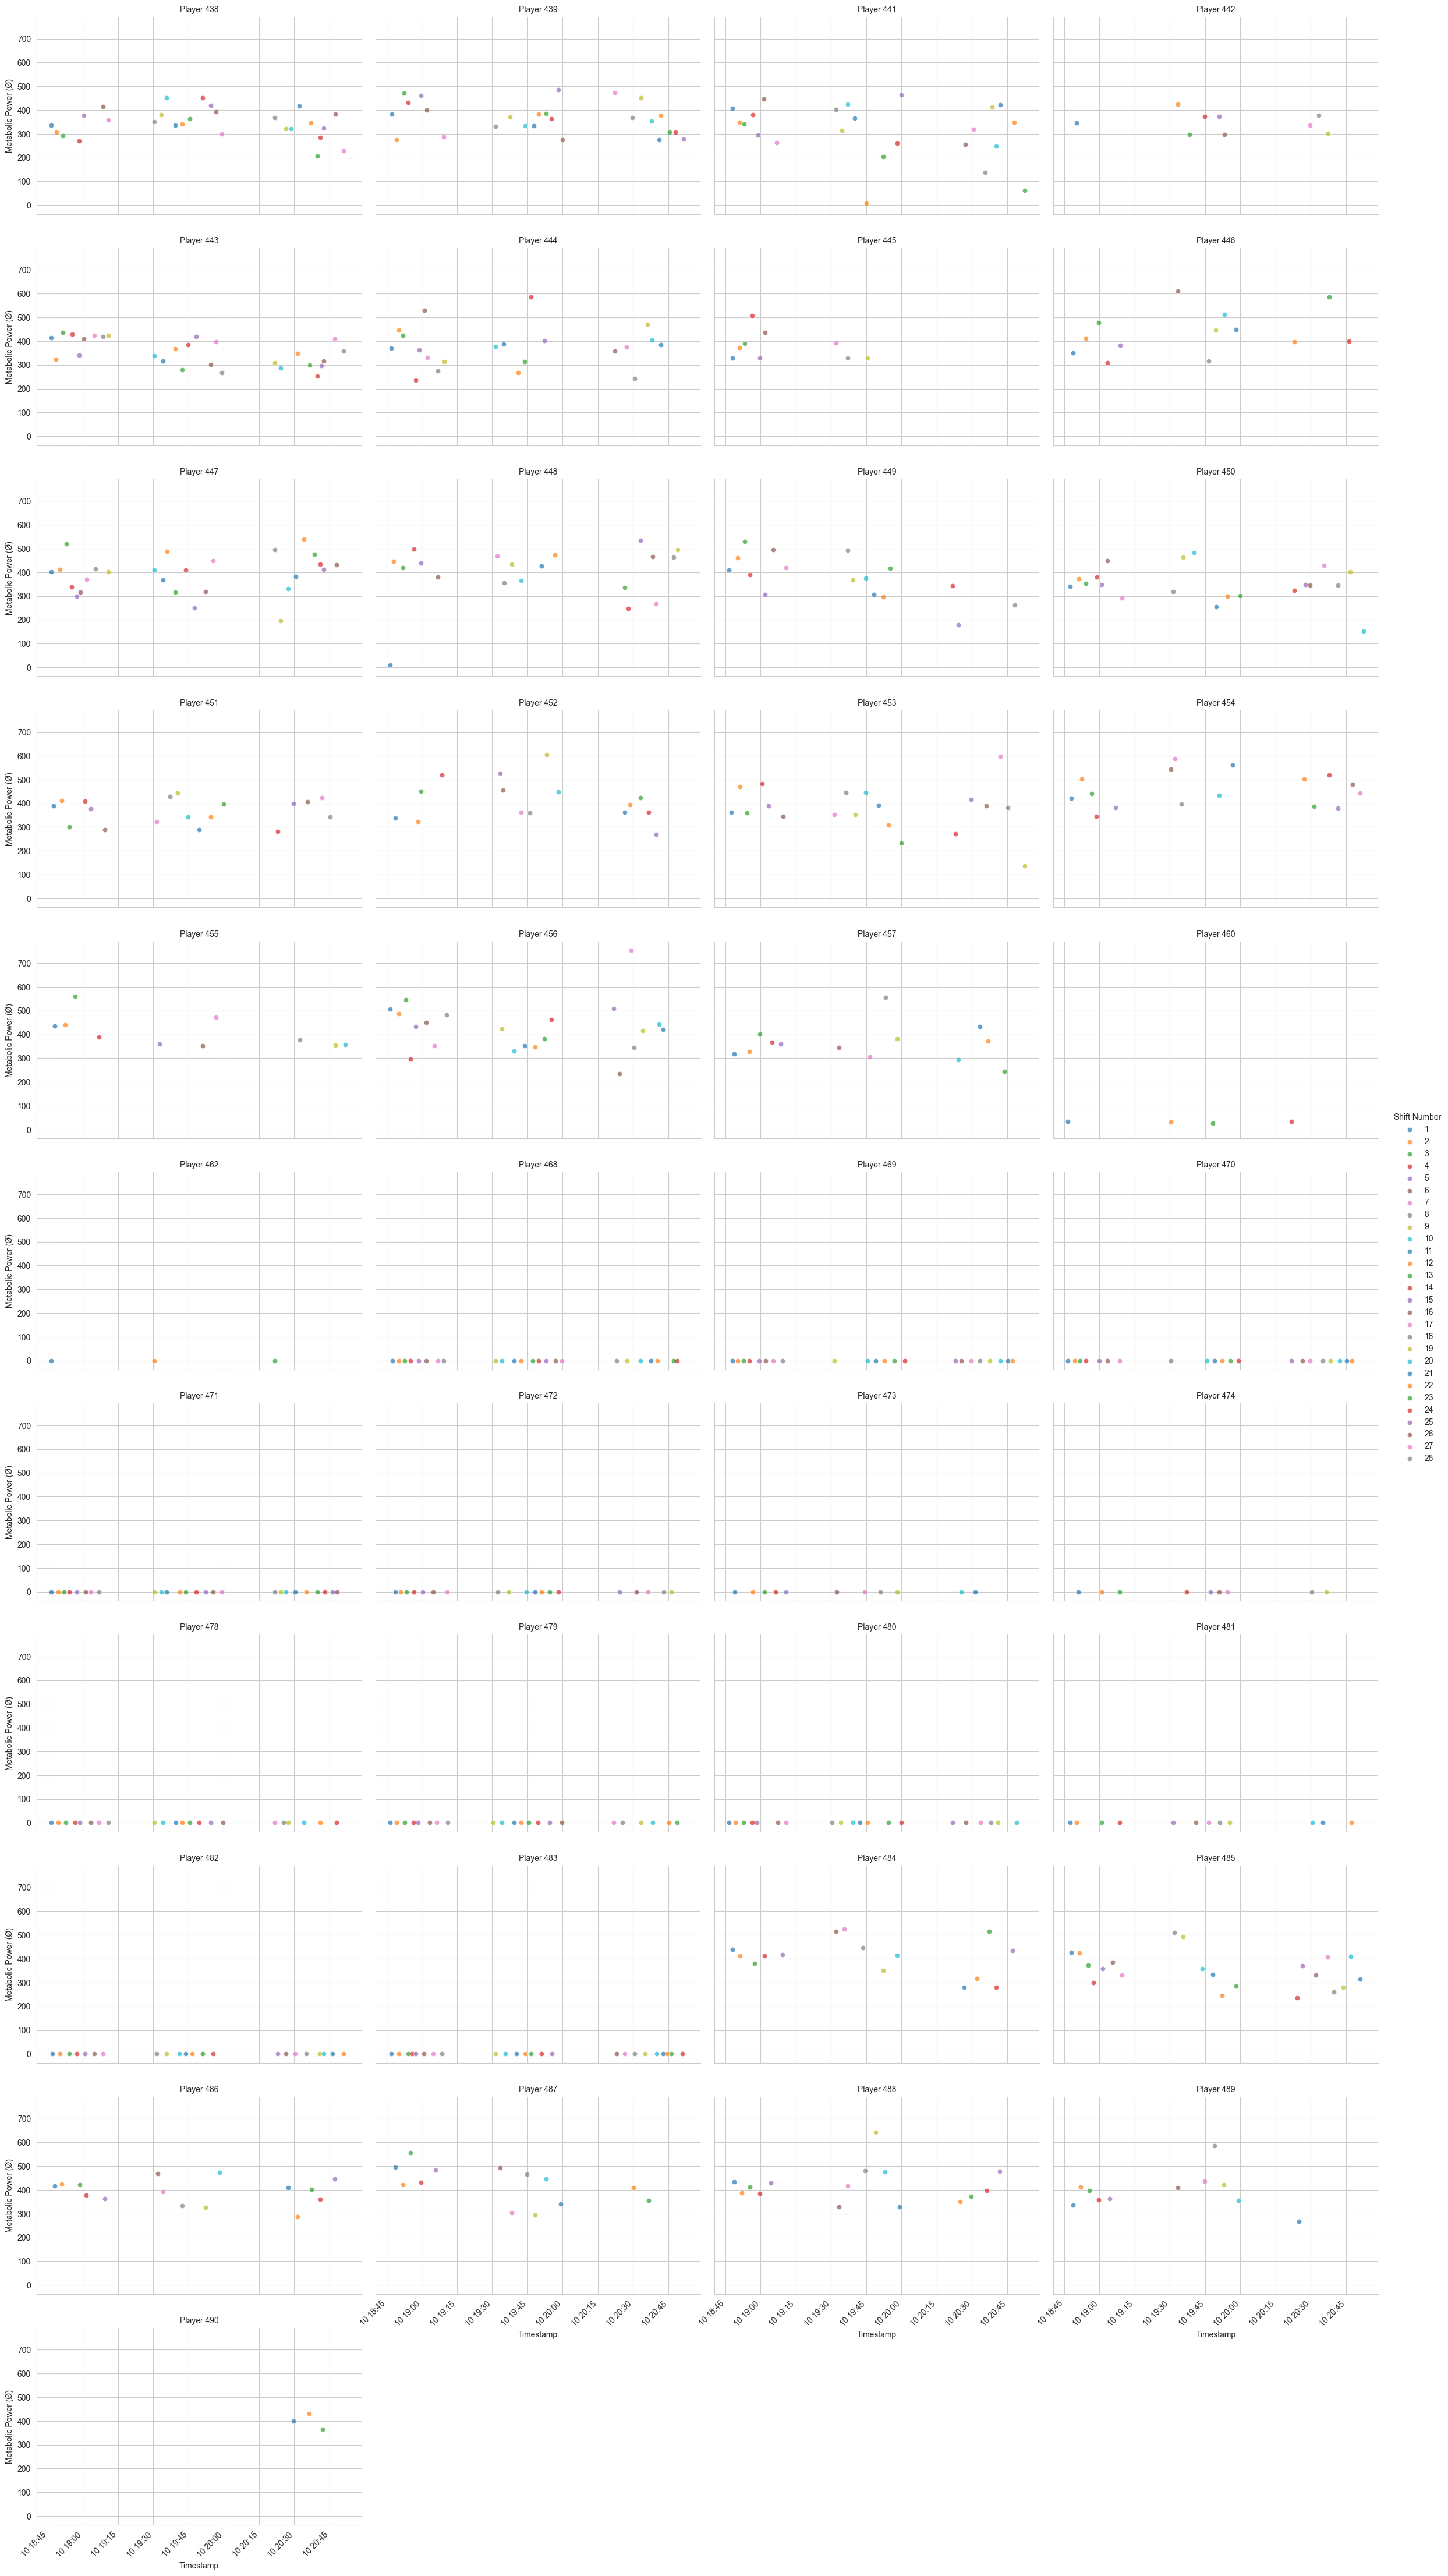

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Stellen Sie sicher, dass der DataFrame df ist, der die individuellen Eventdaten enthält.
# Konvertierung von 'Timestamp (ms)' in eine lesbare Zeit (optional)
df['Readable Timestamp'] = pd.to_datetime(df['Timestamp (ms)'], unit='ms')

# Verwendung von df_relevant für das Mapping von durchschnittlicher metabolischer Leistung, wenn nötig
# Wir müssen sicherstellen, dass df die individuellen Events für jeden Spieler und Shift enthält

# Erstellen eines FacetGrids, gruppiert nach Spieler
g = sns.FacetGrid(df, col="Player ID", hue="Shift Number", col_wrap=4, height=4, aspect=1.5, palette="tab10")
g.map(sns.scatterplot, 'Readable Timestamp', 'Metabolic Power (Ø)', alpha=0.7)

# Anpassen der Achsenbeschriftungen und Titel
g.set_axis_labels('Timestamp', 'Metabolic Power (Ø)')
g.set_titles('Player {col_name}')
g.add_legend(title='Shift Number')

# Anpassen der X-Achsen-Ticklabels für bessere Lesbarkeit
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.show()

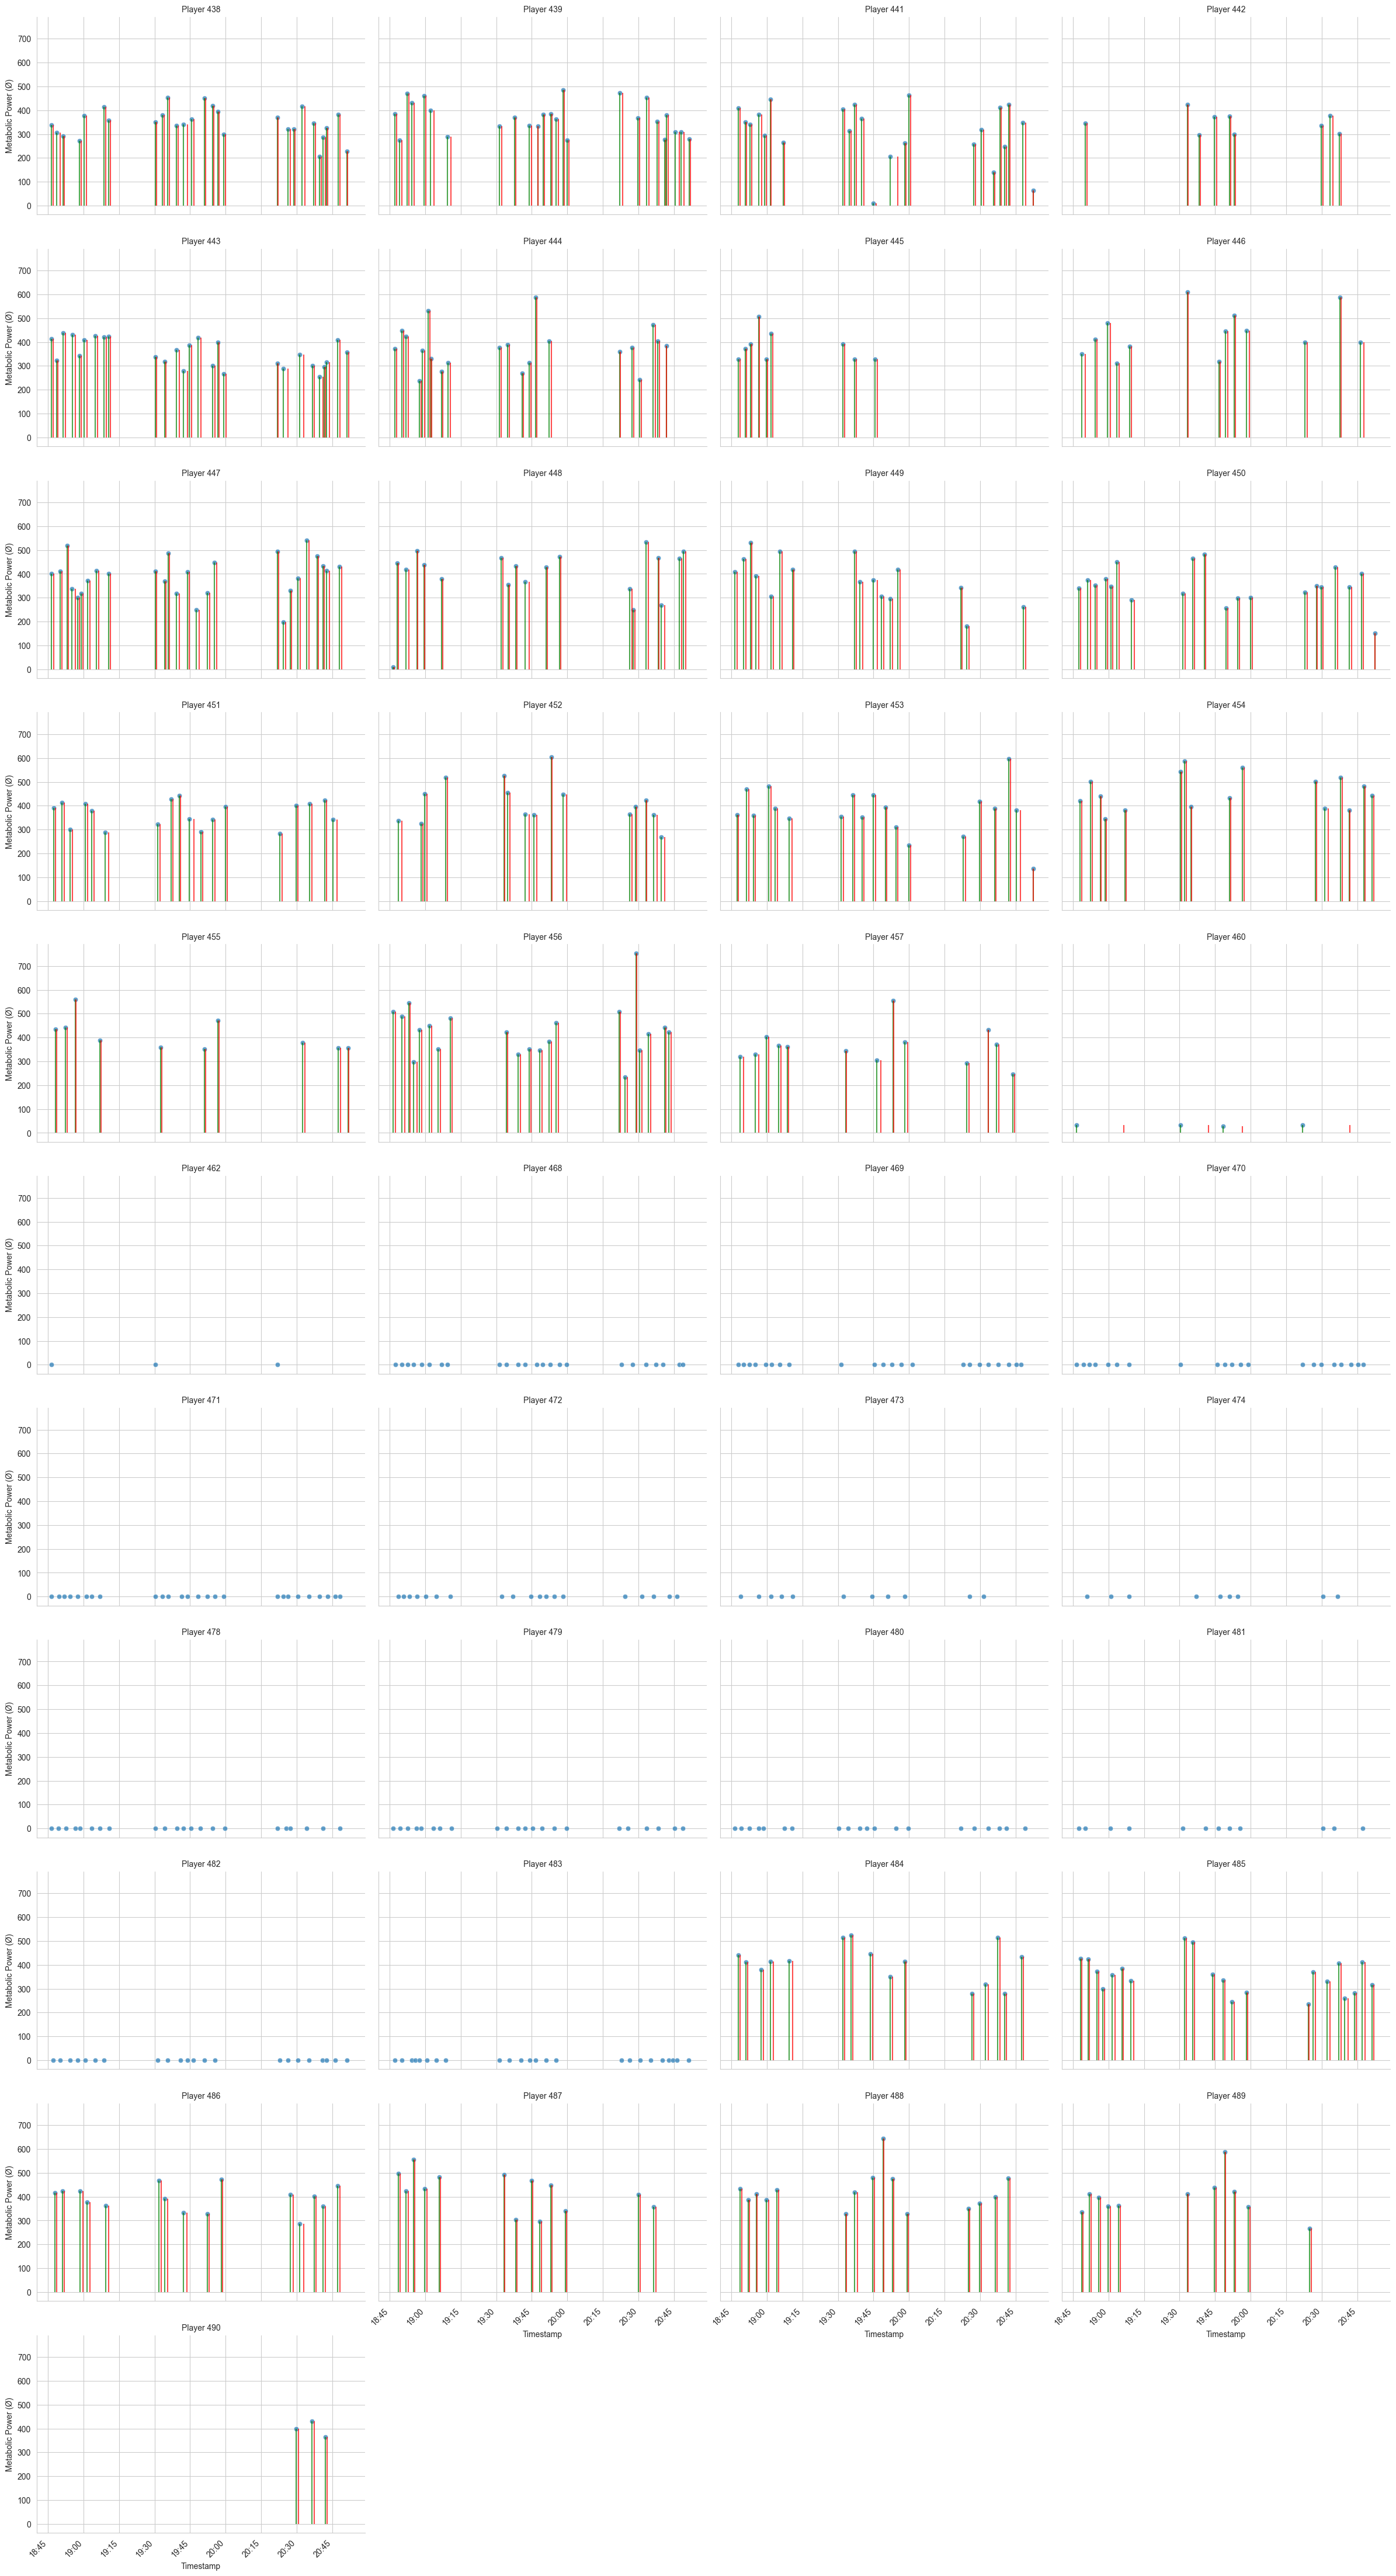

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Annahme, dass df Ihr DataFrame ist und bereits initialisiert wurde

# Konvertieren von 'Timestamp (ms)' in lesbare Zeit, wenn nicht bereits geschehen
df['Readable Timestamp'] = pd.to_datetime(df['Timestamp (ms)'], unit='ms')

# Berechnen des Endzeitpunkts für jedes Ereignis basierend auf der Duration (s)
df['End Timestamp'] = df['Readable Timestamp'] + pd.to_timedelta(df['Duration (s)'], unit='s')

# Erstellen des FacetGrids
g = sns.FacetGrid(df, col="Player ID", col_wrap=4, height=4, aspect=1.5)

# Funktion zum Zeichnen der vertikalen Linien von den Punkten aus nach unten
def draw_duration_lines(data, **kwargs):
    ax = plt.gca()  # Holt den aktuellen Axes-Subplot
    # Zeichnen der vertikalen Linien
    for _, row in data.iterrows():
        # ax.vlines kann verwendet werden, um vertikale Linien bei x mit ymind und ymax zu zeichnen
        ax.vlines(x=row['Readable Timestamp'], ymin=0, ymax=row['Metabolic Power (Ø)'], color='green', linestyle='-', alpha=0.7)
        end_time = row['Readable Timestamp'] + pd.to_timedelta(row['Duration (s)'], unit='s')
        ax.vlines(x=end_time, ymin=0, ymax=row['Metabolic Power (Ø)'], color='red', linestyle='-', alpha=0.7)

# Hinzufügen der vertikalen Linien für die Dauer
g.map_dataframe(draw_duration_lines)

# Hinzufügen der Scatterplots für die Timestamps
g.map_dataframe(sns.scatterplot, 'Readable Timestamp', 'Metabolic Power (Ø)', alpha=0.7)

# Anpassen der Achsenbeschriftungen und Titel
g.set_axis_labels('Timestamp', 'Metabolic Power (Ø)')
g.set_titles('Player {col_name}')

# Formatieren der X-Achse für Zeitdaten
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    # Drehen und ausrichten der Datumslables für bessere Lesbarkeit
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

* Jeder blaue Punkt repräsentiert den mittleren Wert der 'Metabolic Power (Ø)' für einen bestimmten Shift (Arbeitseinsatz oder Spielphase) des Spielers.
* Jede grüne Linie markiert den Startzeitpunkt eines Shifts.
* Jede rote Linie markiert den Endzeitpunkt eines Shifts.
* Die vertikalen Linien geben also den Zeitraum an, in dem der Spieler aktiv war, und die Höhe der Punkte zeigt die Intensität dieser Aktivität gemessen an der metabolischen Leistung während dieser Zeit. Die Dichte der Linien über die Zeit kann als Indikator für die Häufigkeit und Dauer der Aktivitätsperioden des Spielers während des Spiels gesehen werden.

Zusammenfassend beschreibt dieser Plot das Muster und die Intensität der Aktivität jedes Spielers über die Zeit. Es kann verwendet werden, um das Engagement und die Leistung der Spieler zu vergleichen, sowie um die Planung von Trainings- und Erholungsphasen zu unterstützen.

Überlegungen: Shift Differenz in "avg Metabolic power (Ø)" oder Trend in "Metabolic power (Ø)", wenn gegen Ende weniger "Metabolic power (Ø)" --> noch potential für Verbesserung /oder aus Belastung anschauen d.h. Spieler mit generell hoher Belastung (duration*"Metabolic power (Ø)" oder Dichte der Linien (grün/rot vs. Pausenzeiten) schützen?

In [107]:
print(df.columns.tolist())

['Timestamp (ms)', 'Timestamp in local format', 'Player ID', 'Name', 'Event type', 'Duration (s)', 'Distance', 'Distance (speed | Very low)', 'Distance (speed | Low)', 'Distance (speed | Medium)', 'Distance (speed | High)', 'Distance (speed | Very high)', 'Distance (speed | Sprint)', 'Distance (speed | 0 - 0 km/h)', 'Metabolic Power (Ø)', 'Speed (max.)', 'Skating Load', 'Skating Intensity', 'Time diff', 'New Shift', 'Shift Number', 'Shift Start', 'Shift End', 'Next Shift Start', 'Pause Duration', 'Avg Metabolic Power', 'Readable Timestamp', 'End Timestamp']
